### Quantum Simulation of Transverse-Field Ising Model via Trotter Decomposition

This simulation models the unitary time evolution of a quantum spin chain governed by the **transverse-field Ising model (TFIM)**:

\\[
H = -J \sum_{i=1}^{L} \sigma^z_i \sigma^z_{i+1} - h \sum_{i=1}^{L} \sigma^x_i
\\]

Here:
- \\( \sigma^z \) and \( \sigma^x \\) are Pauli matrices.
- \\( J \\) is the nearest-neighbor Ising interaction strength.
- \\( h \\) is the transverse magnetic field strength.
- The system uses **periodic boundary conditions**.

This Hamiltonian contains non-commuting terms, so we simulate the dynamics using the **Trotter-Suzuki decomposition**. We apply a **first-order Trotter approximation** to split the time evolution operator:

\\[
e^{-i H \Delta t} \approx e^{-i H_Z \Delta t} \, e^{-i H_X \Delta t}
\\]

where:
- \\( H_Z = -J \sum \sigma^z_i \sigma^z_{i+1} \\)
- \\( H_X = -h \sum \sigma^x_i \\)

We begin with an initial state where all spins point up: \\( |\psi_0\rangle = |000\ldots0\rangle \\). At each Trotter step, we apply the time evolution operator to the wavefunction and compute the **average magnetization per site**:

\\[
\langle \sigma^z \rangle = \frac{1}{L} \sum_i \langle \psi | \sigma^z_i | \psi \rangle
\\]

This observable helps us understand how the system's quantum state evolves under the competition between spin alignment (from \\( J \\)) and spin flipping (from \\( h \\)).



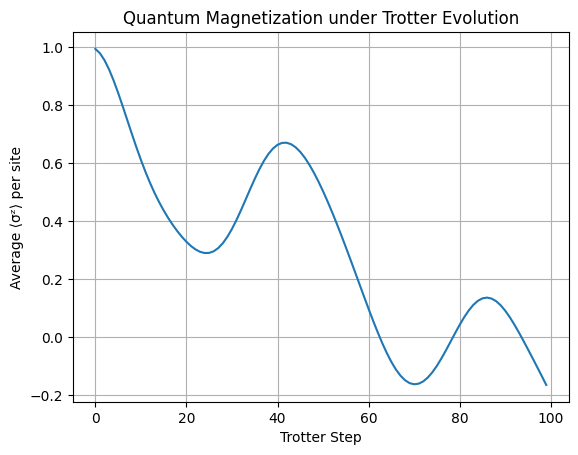

In [2]:
# ----------------------------------------------
# Quantum Simulation of the Transverse-Field Ising Model (TFIM)
# via First-Order Trotter Decomposition (1D chain, periodic BC)
#
# This code simulates the time evolution of a quantum spin chain
# under the Hamiltonian:
#     H = -J Σ σᶻᵢ σᶻᵢ₊₁ - h Σ σˣᵢ
# where the non-commuting terms are handled via Trotter splitting.
# The system starts in the |000...0⟩ state and we track how the
# average magnetization ⟨σᶻ⟩ evolves over time.
# ----------------------------------------------

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# --- Define Pauli matrices ---
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

# --- Set simulation parameters ---
L = 4            # Number of spins (system size)
J = 1.0          # Ising interaction strength
h = 1.0          # Transverse field strength
delta_t = 0.05   # Time step for Trotter evolution
steps = 100      # Number of time steps

# --- Helper: Kronecker product of operator list ---
def kron_n(op_list):
    """Compute the Kronecker product of a list of operators."""
    result = op_list[0]
    for op in op_list[1:]:
        result = np.kron(result, op)
    return result

# --- Build the H_Z = -J Σ σᶻᵢ σᶻᵢ₊₁ term ---
def build_Hz(L):
    H = np.zeros((2**L, 2**L), dtype=complex)
    for i in range(L):
        ops = [I]*L
        ops[i] = Z
        ops[(i+1)%L] = Z  # periodic boundary
        H -= J * kron_n(ops)
    return H

# --- Build the H_X = -h Σ σˣᵢ term ---
def build_Hx(L):
    H = np.zeros((2**L, 2**L), dtype=complex)
    for i in range(L):
        ops = [I]*L
        ops[i] = X
        H -= h * kron_n(ops)
    return H

# --- Build full Hamiltonians ---
Hz = build_Hz(L)
Hx = build_Hx(L)

# --- Time evolution operators for Trotter decomposition ---
U_z = la.expm(-1j * delta_t * Hz)
U_x = la.expm(-1j * delta_t * Hx)

# --- Initial state: all spins up (|000...0⟩ in computational basis) ---
psi0 = np.zeros(2**L, dtype=complex)
psi0[0] = 1.0  # Only the |000...0⟩ basis state is populated

# --- Initialize state and storage for observables ---
psi = psi0.copy()
magnetizations = []

# --- Helper: Compute average magnetization per site ⟨σᶻ⟩ ---
def measure_magnetization(psi):
    mz_total = 0
    for i in range(L):
        ops = [I]*L
        ops[i] = Z
        Z_i = kron_n(ops)
        mz_total += np.vdot(psi, Z_i @ psi).real
    return mz_total / L

# --- Time evolution loop using Trotter steps ---
for _ in range(steps):
    psi = U_z @ (U_x @ psi)  # Apply first-order Trotter step
    magnetizations.append(measure_magnetization(psi))

# --- Plot magnetization over time ---
plt.plot(magnetizations)
plt.xlabel('Trotter Step')
plt.ylabel('Average ⟨σᶻ⟩ per site')
plt.title('Quantum Magnetization under Trotter Evolution')
plt.grid(True)
plt.show()


### Interpretation of the Magnetization Plot

The plot shows the time evolution of the average magnetization per site \( \langle \sigma^z \rangle \) in a quantum spin chain under the transverse-field Ising model (TFIM), using first-order Trotter decomposition.

We observe the following features:

- **Initial Value:** The system starts in the fully polarized state \\( |000\ldots0\rangle \\), so \\( \langle \sigma^z \rangle \approx 1 \\) at \( t = 0 \), as expected.

- **Oscillatory Behavior:** Over time, the magnetization exhibits **coherent oscillations**, a hallmark of unitary quantum evolution. These arise from the interplay between:
  - the Ising interaction \( J \), which favors spin alignment in the \( z \)-direction, and
  - the transverse field \( h \), which induces spin flips via \\( \sigma^x \\) terms.

- **Beating and Decay-like Envelope:** The non-monotonic envelope (visible around steps 40–100) is not true decay but rather a **quasi-periodic beating** pattern due to the discrete energy spectrum and multiple interfering eigenstates of the system. This reflects rich many-body dynamics even in small spin chains.

- **No Thermalization:** Because the simulation is fully unitary (no dissipation or decoherence), the system does not relax to a thermal state. The oscillations persist rather than damping out over time.

This demonstrates how quantum spin chains evolve under competing interactions and how magnetization can be used as a probe to study dynamical behavior.


### 2nd-Order Trotter-Suzuki Decomposition for Quantum Simulation

This code improves the fidelity of quantum simulation for the transverse-field Ising model (TFIM) by implementing a **second-order Trotter-Suzuki decomposition**, also known as **Strang splitting**.

Given a Hamiltonian with two non-commuting parts:
\\[
H = H_Z + H_X
\\]
we approximate time evolution over a small step \( \Delta t \) by:
\\[
U(\Delta t) \approx e^{-i H_X \Delta t / 2} \, e^{-i H_Z \Delta t} \, e^{-i H_X \Delta t / 2}
\\]

This symmetric formula reduces Trotter errors from \( \mathcal{O}(\Delta t^2) \) in the first-order case to \( \mathcal{O}(\Delta t^3) \), yielding higher fidelity over long evolution times.

- \\( H_Z = -J \sum \sigma^z_i \sigma^z_{i+1} \\): Ising interaction
- \\( H_X = -h \sum \sigma^x_i \\): transverse field

The system begins in the all-up state \\( |\psi_0\rangle = |000\ldots0\rangle \\), and we track the **average magnetization** \\( \langle \sigma^z \rangle \\) over time.

This enhanced decomposition helps capture the correct dynamics of many-body quantum systems with non-commuting Hamiltonian terms.


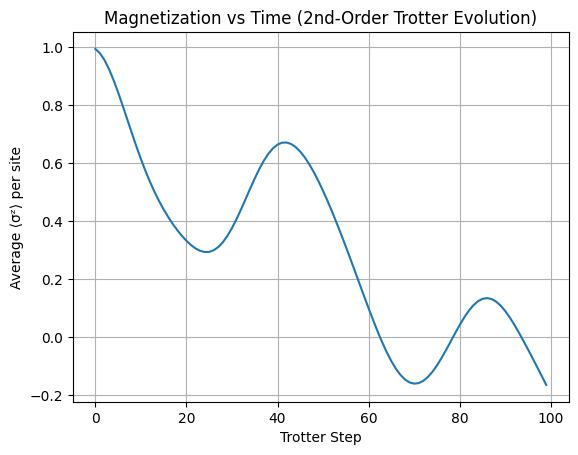

In [7]:
# ----------------------------------------------
# Quantum Simulation of Transverse-Field Ising Model (TFIM)
# using Second-Order Trotter-Suzuki Decomposition (Strang Splitting)
#
# This version improves accuracy by symmetrically applying the non-commuting
# parts of the Hamiltonian during each time step.
# ----------------------------------------------

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# --- Pauli matrices ---
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

# --- System parameters ---
L = 4            # Number of spins
J = 1.0          # Ising interaction
h = 1.0          # Transverse field
delta_t = 0.05   # Trotter time step
steps = 100      # Number of steps

# --- Kronecker helper ---
def kron_n(op_list):
    """Kronecker product of a list of operators."""
    result = op_list[0]
    for op in op_list[1:]:
        result = np.kron(result, op)
    return result

# --- Build H_Z = -J ∑ σᶻᵢ σᶻᵢ₊₁ ---
def build_Hz(L):
    H = np.zeros((2**L, 2**L), dtype=complex)
    for i in range(L):
        ops = [I]*L
        ops[i] = Z
        ops[(i+1)%L] = Z  # periodic
        H -= J * kron_n(ops)
    return H

# --- Build H_X = -h ∑ σˣᵢ ---
def build_Hx(L):
    H = np.zeros((2**L, 2**L), dtype=complex)
    for i in range(L):
        ops = [I]*L
        ops[i] = X
        H -= h * kron_n(ops)
    return H

# --- Construct Hamiltonians ---
Hz = build_Hz(L)
Hx = build_Hx(L)

# --- Second-order Trotter operators ---
U_x_half = la.expm(-1j * Hx * delta_t / 2)
U_z_full = la.expm(-1j * Hz * delta_t)

# --- Initial quantum state: all spins up (|000...0⟩) ---
psi0 = np.zeros(2**L, dtype=complex)
psi0[0] = 1.0

psi = psi0.copy()
magnetizations = []

# --- Magnetization measurement: ⟨σᶻ⟩ per site ---
def measure_magnetization(psi):
    mz = 0
    for i in range(L):
        ops = [I]*L
        ops[i] = Z
        Z_i = kron_n(ops)
        mz += np.vdot(psi, Z_i @ psi).real
    return mz / L

# --- Time evolution loop ---
for _ in range(steps):
    psi = U_x_half @ psi         # half-step Hx
    psi = U_z_full @ psi         # full-step Hz
    psi = U_x_half @ psi         # half-step Hx
    magnetizations.append(measure_magnetization(psi))

# --- Plot results ---
plt.plot(magnetizations)
plt.xlabel('Trotter Step')
plt.ylabel('Average ⟨σᶻ⟩ per site')
plt.title('Magnetization vs Time (2nd-Order Trotter Evolution)')
plt.grid(True)
plt.show()


### Comparison to Exact Quantum Evolution

To verify the accuracy of the second-order Trotter simulation, we compare it to the **exact unitary evolution** under the full Hamiltonian:

\\[
H = -J \sum \sigma^z_i \sigma^z_{i+1} - h \sum \sigma^x_i
\\]

We compute the **exact time evolution operator**:

\\[
U_{\text{exact}}(\Delta t) = \exp(-i H \Delta t)
\\]

Then, at each time step, we compute the **quantum fidelity**:

\\[
F(t) = |\langle \psi_{\text{exact}}(t) | \psi_{\text{trotter}}(t) \rangle|^2
\\]

This fidelity quantifies the overlap between the Trotter-evolved and exact-evolved wavefunctions. A fidelity of 1 indicates perfect agreement.

We plot:
- **Magnetization** ⟨σᶻ⟩ from the Trotter-evolved state
- **Fidelity** with the exact state

This allows us to directly observe both physical behavior and numerical accuracy over time.


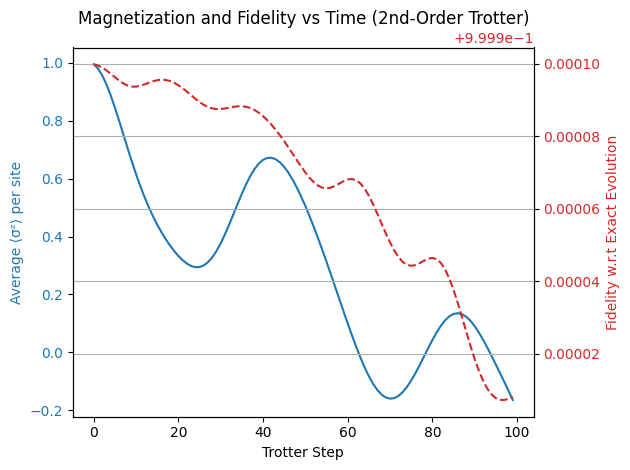

In [8]:
# ... (include same imports, Pauli matrices, system parameters as before)

# --- Build full Hamiltonian H = H_Z + H_X ---
H = Hz + Hx

# --- Initial state (same as before) ---
psi0 = np.zeros(2**L, dtype=complex)
psi0[0] = 1.0

# --- Prepare variables ---
psi_trotter = psi0.copy()
psi_exact = psi0.copy()
magnetizations = []
fidelities = []

# --- Precompute unitary evolution for full H ---
U_exact = la.expm(-1j * H * delta_t)

# --- Second-order Trotter operators ---
U_x_half = la.expm(-1j * Hx * delta_t / 2)
U_z_full = la.expm(-1j * Hz * delta_t)

# --- Measurement: ⟨σᶻ⟩ per site ---
def measure_magnetization(psi):
    mz = 0
    for i in range(L):
        ops = [I]*L
        ops[i] = Z
        Z_i = kron_n(ops)
        mz += np.vdot(psi, Z_i @ psi).real
    return mz / L

# --- Simulation loop ---
for _ in range(steps):
    # --- Evolve trotter ---
    psi_trotter = U_x_half @ psi_trotter
    psi_trotter = U_z_full @ psi_trotter
    psi_trotter = U_x_half @ psi_trotter

    # --- Evolve exact ---
    psi_exact = U_exact @ psi_exact

    # --- Fidelity and observables ---
    magnetizations.append(measure_magnetization(psi_trotter))
    fidelity = np.abs(np.vdot(psi_exact, psi_trotter))**2
    fidelities.append(fidelity)

# --- Plot both magnetization and fidelity ---
fig, ax1 = plt.subplots()

# Plot magnetization
ax1.plot(magnetizations, color='tab:blue')
ax1.set_xlabel('Trotter Step')
ax1.set_ylabel('Average ⟨σᶻ⟩ per site', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot fidelity on second axis
ax2 = ax1.twinx()
ax2.plot(fidelities, color='tab:red', linestyle='--')
ax2.set_ylabel('Fidelity w.r.t Exact Evolution', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Magnetization and Fidelity vs Time (2nd-Order Trotter)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Fidelity Comparison: First vs Second-Order Trotter Decomposition

This plot compares the accuracy of:
- **1st-order Trotter**: \( e^{-i H_Z \Delta t} e^{-i H_X \Delta t} \)
- **2nd-order Trotter (Strang)**: \( e^{-i H_X \Delta t/2} e^{-i H_Z \Delta t} e^{-i H_X \Delta t/2} \)

against the **exact quantum evolution** \( e^{-i H \Delta t} \) over multiple time steps.

#### Interpretation:
- The **2nd-order scheme** retains significantly higher fidelity for longer times due to its symmetric structure, which cancels out some leading-order Trotter errors.
- The **1st-order scheme** begins to deviate more quickly, showing the accumulation of Trotter errors.
- Both methods are unitary and conserve norm, but fidelity tracks how well they match the *true* dynamics.

This demonstrates the importance of using higher-order Trotter formulas in quantum simulations, especially for long evolution times or larger systems.


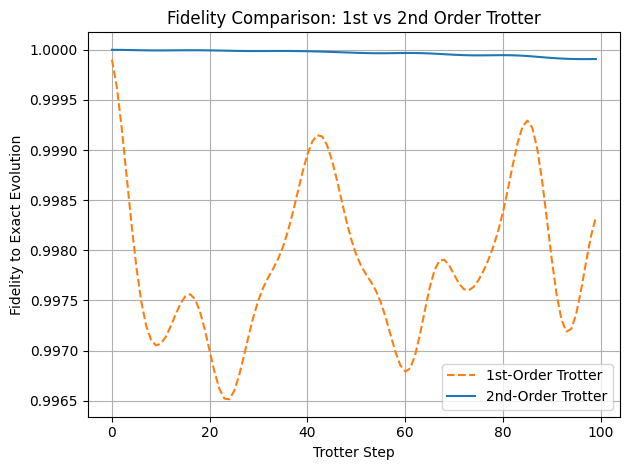

In [10]:
# ----------------------------------------------------------
# Quantum Simulation: Compare 1st- vs 2nd-Order Trotter Fidelity
#
# This code simulates the time evolution of a quantum spin chain (TFIM)
# using both first-order and second-order Trotter decompositions.
# At each step, it compares the fidelity of both methods to the exact
# evolution obtained from the full Hamiltonian.
# ----------------------------------------------------------

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# --- Define Pauli matrices ---
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

# --- Simulation parameters ---
L = 4            # Number of spins (try 6 if memory allows)
J = 1.0          # Ising coupling strength
h = 1.0          # Transverse field strength
delta_t = 0.05   # Time step size
steps = 100      # Number of Trotter steps

# --- Helper function to build Kronecker product of a list of matrices ---
def kron_n(op_list):
    result = op_list[0]
    for op in op_list[1:]:
        result = np.kron(result, op)
    return result

# --- Construct H_Z = -J ∑ σᶻᵢ σᶻᵢ₊₁ ---
def build_Hz(L):
    H = np.zeros((2**L, 2**L), dtype=complex)
    for i in range(L):
        ops = [I]*L
        ops[i] = Z
        ops[(i+1)%L] = Z  # Periodic boundary condition
        H -= J * kron_n(ops)
    return H

# --- Construct H_X = -h ∑ σˣᵢ ---
def build_Hx(L):
    H = np.zeros((2**L, 2**L), dtype=complex)
    for i in range(L):
        ops = [I]*L
        ops[i] = X
        H -= h * kron_n(ops)
    return H

# --- Build individual and full Hamiltonians ---
Hz = build_Hz(L)
Hx = build_Hx(L)
H_full = Hz + Hx  # Full Hamiltonian for exact evolution

# --- Unitary time-evolution operators ---
U_z = la.expm(-1j * Hz * delta_t)               # Full step for H_Z (used in both Trotters)
U_x = la.expm(-1j * Hx * delta_t)               # Full step for H_X (1st-order only)
U_exact = la.expm(-1j * H_full * delta_t)       # Exact evolution: U = exp(-i H dt)
U_x_half = la.expm(-1j * Hx * delta_t / 2)      # Half step for H_X (used in 2nd-order)

# --- Initialize state vector (all spins up = |000...0⟩) ---
psi0 = np.zeros(2**L, dtype=complex)
psi0[0] = 1.0  # Only the all-zero basis state is occupied

# --- Copy initial state for all three evolutions ---
psi_1st = psi0.copy()    # First-order Trotter evolution
psi_2nd = psi0.copy()    # Second-order Trotter evolution
psi_exact = psi0.copy()  # Exact evolution

# --- Lists to track fidelity over time ---
fidelity_1st = []   # Fidelity between 1st-order and exact
fidelity_2nd = []   # Fidelity between 2nd-order and exact

# --- Time evolution loop ---
for _ in range(steps):
    # --- First-order Trotter: U ≈ e^{-i H_Z dt} e^{-i H_X dt}
    psi_1st = U_z @ (U_x @ psi_1st)

    # --- Second-order Trotter: U ≈ e^{-i H_X dt/2} e^{-i H_Z dt} e^{-i H_X dt/2}
    psi_2nd = U_x_half @ psi_2nd
    psi_2nd = U_z @ psi_2nd
    psi_2nd = U_x_half @ psi_2nd

    # --- Exact evolution using full Hamiltonian ---
    psi_exact = U_exact @ psi_exact

    # --- Compute fidelities against exact state ---
    f1 = np.abs(np.vdot(psi_exact, psi_1st))**2  # |⟨ψ_exact | ψ_1st⟩|²
    f2 = np.abs(np.vdot(psi_exact, psi_2nd))**2  # |⟨ψ_exact | ψ_2nd⟩|²

    # --- Store results ---
    fidelity_1st.append(f1)
    fidelity_2nd.append(f2)

# --- Plot fidelity over time ---
plt.plot(fidelity_1st, label='1st-Order Trotter', linestyle='--', color='tab:orange')
plt.plot(fidelity_2nd, label='2nd-Order Trotter', linestyle='-', color='tab:blue')
plt.xlabel('Trotter Step')
plt.ylabel('Fidelity to Exact Evolution')
plt.title('Fidelity Comparison: 1st vs 2nd Order Trotter')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
